## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

In [1]:
import pandas as pd
mname='hams2' 

#contacts=pd.read_csv('../test_data2/output/'+mname+'_contacts4.csv',",")
#actual_cpts=set(contacts['formation'])

#contacts2=contacts.loc[contacts['formation'].isin(actual_cpts)]  
#contacts2.to_csv('../test_data2/output/'+mname+'_contacts5.csv',index=False)
 
#orientations=pd.read_csv('../test_data3/output/orientations_clean.csv',",")
#orientations2=orientations.loc[orientations['formation'].isin(actual_cpts)]  
#orientations2.to_csv('../test_data3/output/'+mname+'_orientations2.csv',index=False)


In [2]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

mname='hams2' 
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
# extents=[   np.round_(geom_rp['coordinates'][0][0][0]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][2][0]-step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][1][1]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][0][1]-step_in, decimals=-3),
#             model_base,1200]

#print(extents)
gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, -3000, 1200],
    resolution = (50,50,50), 
      path_o = '../test_data3/output/orientations_clean.csv',
      path_i = '../test_data3/output/contacts_clean.csv', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [3]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()

P__HAb_cib       145
A_HAm_cib         85
A_HAS_xsl_ci      82
A_FOj_xs_b        79
A_HAd_kd          60
P__HAj_xci_od     39
A_mgn_PRK_32      37
P__HAo_ci         34
A_FOh_xs_f        33
A_FOu_bbo         32
P__SKq_stq        20
P__TK_s           18
A_FOp_bs          16
P__WYm_sp         14
A_mgn_PMI_520      7
P__WYa_st          2
P__TKk_sf          1
basement           0
Name: surface, dtype: int64

## Show example orientations

In [4]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A_mgn_PRK_32     37
A_FOj_xs_b       21
A_FOh_xs_f       20
P__HAb_cib       16
A_HAm_cib        13
A_FOu_bbo         9
A_mgn_PMI_520     7
A_FOp_bs          7
A_HAS_xsl_ci      6
P__SKq_stq        5
P__TKk_sf         3
P__HAj_xci_od     3
A_HAd_kd          3
P__TK_s           2
P__HAo_ci         1
P__WYm_sp         1
P__WYa_st         1
basement          0
Name: surface, dtype: int64

## Plot some of this data

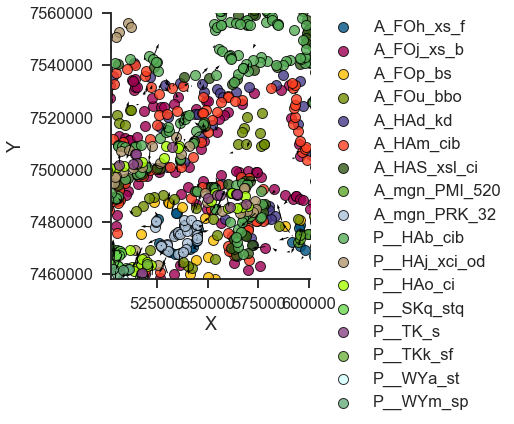

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
Cropped raster to geo_model.grid.extent.
[ 502536  600652 7458000 7560000] [173 166]
storing converted file...
Active grids: ['regular' 'topography']


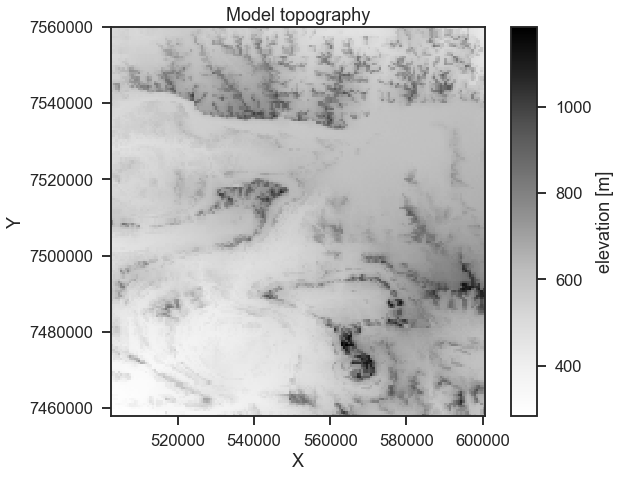

In [6]:
print(os.getcwd())
fp = '../test_data3/dtm/dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)

## Load stratigraphic Series

#f=open('../test_data2/tmp/hams2_groups.csv',"r")
#contents =f.readlines()
#f.close

# # This is not necessary all data objects are created and linked to geo_model on the init call!!!

# # faults = gp.Faults()
# # series = gp.Series(faults)
# # series.df

#ngroups=(contents[0]).split(" ")
#ngroups=int(ngroups[1])

contents=np.genfromtxt('../test_data3/tmp/groups_clean.csv',delimiter=',',dtype='U25')
ngroups=len(contents)

groups=[]

for i in range (0,ngroups):
     groups.append(contents[i].replace("\n",""))
#     geo_model.add_series(contents[i].replace("\n",""))

# geo_model.delete_series(['Default series', 'Basement'])



## Load surfaces and assign to series

In [7]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_FOh_xs_f,Default series,1,False,#015482,1
1,A_FOj_xs_b,Default series,2,False,#9f0052,2
2,A_FOp_bs,Default series,3,False,#ffbe00,3
3,A_FOu_bbo,Default series,4,False,#728f02,4
4,A_HAd_kd,Default series,5,False,#443988,5
5,A_HAm_cib,Default series,6,False,#ff3f20,6
6,A_HAS_xsl_ci,Default series,7,False,#325916,7
7,A_mgn_PMI_520,Default series,8,False,#5DA629,8
8,A_mgn_PRK_32,Default series,9,False,#acc2d9,9
9,P__HAb_cib,Default series,10,False,#56ae57,10


In [8]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


In [9]:
"""
print(os.getcwd())

for i in range(0,ngroups):
    f=open('../test_data2/tmp/'+groups[i]+'.csv',"r")
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))

    for j in range (1,int(nformations)+1):
        print(contents[j].replace("\n","").replace("-","_"))
        #geo_model.add_surfaces(contents[j].replace("\n",""))
        #d={groups[i]:contents[j].replace("\n","")}
        gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n","").replace("-","_"))},
                                  set_series=True, remove_unused_series=True)
        #geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )
    f.close
"""
print(os.getcwd())

series_dict = {}
formations_list = []
for i in range(0,ngroups):
    #f=open('../test_data3/tmp/'+groups[i]+'.csv',"r")
    #contents =f.readlines()
    #nformations=str(contents[0])
    #nformations=nformations.split(" ")
    #nformations=int(nformations[1].replace("\n",""))
    contents=np.genfromtxt('../test_data3/tmp/'+groups[i]+'.csv',delimiter=',',dtype='U25')
    nformations=len(contents.shape)
    
    if(nformations==1):
        for j in range (1,len(contents)):
            formations_list.append(contents[j].replace("\n","").replace("-","_"))
    else:
        for j in range (1,len(contents[0])):
            formations_list.append(contents[0][j].replace("\n","").replace("-","_"))

        
        
    series_dict[groups[i]] = formations_list
    formations_list = []
    #f.close
series_dict

gp.map_series_to_surfaces(geo_model, series_dict,
                         set_series=True, remove_unused_series=True)

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks


,surface,series,order_surfaces,isBasement,color,id
7,A_mgn_PMI_520,A_mgn_PMI_520,1,False,#5DA629,1
8,A_mgn_PRK_32,A_mgn_PRK_32,1,False,#acc2d9,2
15,P__WYa_st,Wyloo_Group,1,False,#d4ffff,3
16,P__WYm_sp,Wyloo_Group,2,False,#65ab7c,4
12,P__SKq_stq,Shingle_Creek_Group,1,False,#69d84f,5
13,P__TK_s,Turee_Creek_Group,1,False,#894585,6
14,P__TKk_sf,Turee_Creek_Group,2,False,#70b23f,7
4,A_HAd_kd,Hamersley_Group,1,False,#443988,8
5,A_HAm_cib,Hamersley_Group,2,False,#ff3f20,9
6,A_HAS_xsl_ci,Hamersley_Group,3,False,#325916,10


In [10]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
7,A_mgn_PMI_520,A_mgn_PMI_520,1,False,#5DA629,1
8,A_mgn_PRK_32,A_mgn_PRK_32,1,False,#acc2d9,2
15,P__WYa_st,Wyloo_Group,1,False,#d4ffff,3
16,P__WYm_sp,Wyloo_Group,2,False,#65ab7c,4
12,P__SKq_stq,Shingle_Creek_Group,1,False,#69d84f,5
13,P__TK_s,Turee_Creek_Group,1,False,#894585,6
14,P__TKk_sf,Turee_Creek_Group,2,False,#70b23f,7
4,A_HAd_kd,Hamersley_Group,1,False,#443988,8
5,A_HAm_cib,Hamersley_Group,2,False,#ff3f20,9
6,A_HAS_xsl_ci,Hamersley_Group,3,False,#325916,10


In [11]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
387,595340.7800,7475216.881,648.00000,0.694578,0.338324,0.500042,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
388,599321.5095,7475169.920,638.00000,0.712253,0.338115,0.499998,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
389,602892.4896,7474513.942,644.00000,0.728109,0.335203,0.500025,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
390,603028.0000,7470668.840,608.00000,0.728711,0.318129,0.499865,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
391,594340.5406,7472033.801,639.00000,0.690136,0.324190,0.500002,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
392,595744.7679,7473247.830,614.00000,0.696371,0.329581,0.499891,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
393,595536.4201,7474910.380,648.00000,0.695446,0.336963,0.500042,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
394,537833.3905,7468177.289,418.00000,0.439227,0.307066,0.499021,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08
395,536291.3397,7468096.750,421.00000,0.432380,0.306708,0.499034,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08
396,535436.6282,7467566.748,457.00000,0.428585,0.304355,0.499194,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08


In [12]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
111,595340.779975,7.475217e+06,648.0,0.694578,0.338324,0.500042,1.000000e-12,1.000000e-12,1.000000e-12,45.0,356.474569,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
112,599321.509484,7.475170e+06,638.0,0.712253,0.338115,0.499998,1.000000e-12,1.000000e-12,1.000000e-12,45.0,349.565907,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
113,602892.489608,7.474514e+06,644.0,0.728109,0.335203,0.500025,1.000000e-12,1.000000e-12,1.000000e-12,45.0,19.953208,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
114,603028.000000,7.470669e+06,608.0,0.728711,0.318129,0.499865,1.000000e-12,1.000000e-12,1.000000e-12,45.0,198.108635,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
115,594340.540554,7.472034e+06,639.0,0.690136,0.324190,0.500002,1.000000e-12,1.000000e-12,1.000000e-12,45.0,217.649577,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
116,595744.767907,7.473248e+06,614.0,0.696371,0.329581,0.499891,1.000000e-12,1.000000e-12,1.000000e-12,45.0,331.034223,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
117,595536.420074,7.474910e+06,648.0,0.695446,0.336963,0.500042,1.000000e-12,1.000000e-12,1.000000e-12,45.0,237.449786,0.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
118,537833.390495,7.468177e+06,418.0,0.439227,0.307066,0.499021,1.000000e-12,1.000000e-12,1.000000e-12,45.0,175.536900,0.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01
119,536291.339715,7.468097e+06,421.0,0.432380,0.306708,0.499034,1.000000e-12,1.000000e-12,1.000000e-12,45.0,164.453612,0.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01
120,535436.628241,7.467567e+06,457.0,0.428585,0.304355,0.499194,1.000000e-12,1.000000e-12,1.000000e-12,45.0,127.014390,0.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01


## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [13]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1

In [14]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float 32

geo_model.additional_data.options.df['dtype'] = 'float32'
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

gp.compute_model(geo_model)
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

### Float64

In [15]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [16]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [17]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,17
number series,7
number surfaces per series,"[1, 1, 2, 1, 2, 6, 4]"
len surfaces surface_points,"[7, 37, 2, 14, 20, 18, 2, 60, 85, 82, 145, 39,..."
len series surface_points,"[7, 37, 16, 20, 20, 445, 160]"
len series orientations,"[7, 37, 2, 5, 5, 42, 57]"


## Calculate Model

In [18]:
gp.compute_model(geo_model)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))


ValueError: Empty data passed with indices specified.

In [ ]:
gp.plot.plot_section(geo_model, ve=20)

In [ ]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

## Extract surfaces to visualize in 3D renderers

In [ ]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [ ]:
gp.plot.plot_3D(geo_model,  render_data=False)

## Export model to vtk files

In [ ]:
from gempy import plot
#gp.plot.export_to_vtk(geo_model, path='../test_data3/vtk/', name=mname+'.vtk', voxels=False, block=None, surfaces=True)